In [10]:
import cv2
from deepface import DeepFace
from rescale_frame import rescale_frame
import pandas as pd
import numpy as np


In [11]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
PATH = "video_data/back_hit.mp4"

In [12]:
def run_camera(path):

    cap = cv2.VideoCapture(path)
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    print(total_frames)
    # if not cap.isOpened():
    #     cap = cv2.VideoCapture(0)
    # if not cap.isOpened():
    #     raise IOError("cannot open webcam")

    all_emotions = {"angry":[],
                    "disgust":[],
                    "fear":[],
                    "happy":[],
                    "sad":[],
                    "surprise":[],
                    "neutral":[]}

    while cap.isOpened():
        current_frame = cap.get(cv2.CAP_PROP_POS_FRAMES)
        success, frame = cap.read()

        if not success: break
        #assert(success)
        frame = rescale_frame(frame, 30)
        result = DeepFace.analyze(frame, enforce_detection=False, actions=['emotion'])

        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        faces = faceCascade.detectMultiScale(gray, 1.1,4)

        #draw rectangles around face
        for(x,y,w,h) in faces:
            cv2.rectangle(frame, (x,y), (x+w, y+h), (0,255,0), 2)

        font = cv2.FONT_HERSHEY_SIMPLEX
        # emotions = result['emotion'] #dict of all the emotions
        # sad = emotions["sad"]
        # sad = str(sad)
        cv2.putText(frame, 
                    result["dominant_emotion"], 
                    (50,50),
                    font, 2,
                    (0,0,255),
                    2,
                    cv2.LINE_4)
        #cv2.imshow('original video', frame)

        emo = result["dominant_emotion"]
        all_emotions[emo].append(1)
        for i in all_emotions.keys():
            if i != emo:
                all_emotions[i].append(0)
            
        if cv2.waitKey(5) & 0xFF == 27:
            break


    cap.release()
    cv2.destroyAllWindows()

    return all_emotions

    
    


In [13]:
all_emotions = {"angry":[],
                    "disgust":[],
                    "fear":[],
                    "happy":[],
                    "sad":[],
                    "surprise":[],
                    "neutral":[]}

for i in all_emotions.keys():
    print(i)

('angry', [])
('disgust', [])
('fear', [])
('happy', [])
('sad', [])
('surprise', [])
('neutral', [])


In [14]:
emos = run_camera(PATH)

df = pd.DataFrame.from_dict(emos)

df.head()

612


,angry,disgust,fear,happy,sad,surprise,neutral
0,0,0,1,0,0,0,0
1,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0


<AxesSubplot:title={'center':'Dominant Emotions'}, xlabel='Frames'>

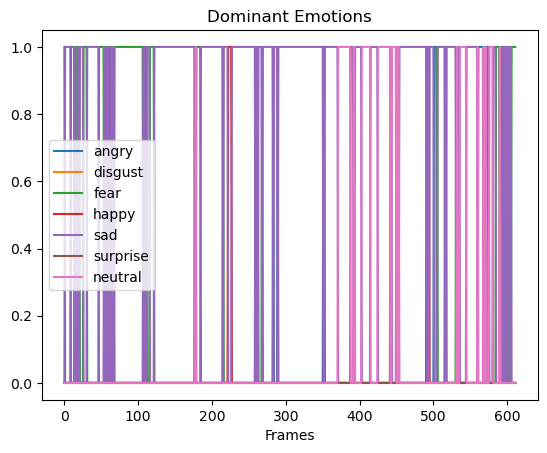

In [32]:
df.plot(use_index=True, title="Dominant Emotions", xlabel="Frames")